# MILESTONE 2

## i. Perkenalan

### Muhammad Fadhil Sadeli
### BATCH 002

## Assignment Objectives

Milestones 1 ini dibuat guna mengevaluasi Pembelajaran Phase 1 dalam konsep Supervised Learning sebagai berikut:

- Mampu memahami konsep supervised learning dan unsupervised learning
- Mampu mempersiapkan data untuk digunakan dalam model supervised learning dan unsupervised learning
- Mampu mengimplementasikan supervised learning dan unsupervised learning dengan dataset yang baru
- Mampu melakukan evaluasi model
- Mampu melakukan model tuning
- Mampu melakukan model deployment

## ii. Import Libraries

`Memasukkan library yang digunakan`

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pickle
warnings.filterwarnings('ignore')

from scipy import stats
from sklearn import set_config
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from feature_engine.outliers import Winsorizer
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score,mean_squared_error
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

## iii. Data Loading

`Import dataset`

In [2]:
data = pd.read_csv('Flight.csv', skipinitialspace = True)
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
data.tail()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


`Mengecek informasi data`

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


`Mencari missing value pada data`

In [5]:
data.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

`Mencari berapa banyak baris data yang duplicate`

In [6]:
data[data.duplicated()].shape

(0, 12)

`Mencari jumlah masing masing unique value di setiap kolomnya` 

In [7]:
for i in data.columns.tolist():
    print(f'num of unique label in {i}: ', len(data[i].unique()))

num of unique label in Unnamed: 0:  300153
num of unique label in airline:  6
num of unique label in flight:  1561
num of unique label in source_city:  6
num of unique label in departure_time:  6
num of unique label in stops:  3
num of unique label in arrival_time:  6
num of unique label in destination_city:  6
num of unique label in class:  2
num of unique label in duration:  476
num of unique label in days_left:  49
num of unique label in price:  12157


In [8]:
data['departure_time'].value_counts()

Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64

In [9]:
data['arrival_time'].value_counts()

Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: arrival_time, dtype: int64

`Mencari informasi lebih mengenai data`

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,300153.0,150076.000000,86646.852011,0.00,75038.00,150076.00,225114.00,300152.00
duration,300153.0,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,26.004751,13.561004,1.00,15.00,26.00,38.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,4783.00,7425.00,42521.00,123071.00


`Describe`

Dataset Harga Tiket Pesawat di India
1) Airline: Nama perusahaan penerbangan.
2) Flight: Kode penerbangan pesawat.
3) Source City: Kota tempat penerbangan lepas landas.
4) Departure Time: Waktu keberangkatan (Early morning, morning, afternoon, evening, night, late night).
5) Stops: Jumlah perhentian antara kota asal dan tujuan.
6) Arrival Time: Waktu kedatangan (Early morning, morning, afternoon, evening, night, late night).
7) Destination City: Kota dimana penerbangan akan mendarat.
8) Class: Kelas Kursi atau penumpang.
9) Duration: Jumlah keseluruhan waktu yang diperlukan untuk melakukan perjalanan antar kota dalam hitungan jam.
10) Days Left: Selisih hari antara waktu memesan tiket dengan tanggal keberangkatan.
11) Price: Harga tiket.

`Berdasarkan general overview yang didapat:`

- Pada data Flight Price tidak mempunyai duplicate data dan missing value.
- Pada data tersebut mempunyai kolom Unnamed: 0 yang tidak digunakan karena kolom tersebut hanya merepresentasikan index saja. Sehingga akan didrop pada cleaning section
- Baris dan kolom pada data flight price sebanyak 300153 baris dan 11 kolom
- Kolom target atau kolom yang akan diprediksi nantinya adalah kolom price atau harga tiket
- Durasi penerbangan yang paling banyak adalah menyampai 49 jam lebih
- Jangka waktu terlama dari memesan tiket hingga penerbanganan adalah 49 hari
- Dilihat dari jumlah unique valuenya, selain target kolom numerikal hanyalah kolom duration dan days left sisanya adalah kategorikal.
- Pada kolom flight mempunyai kode penerbangan berupa huruf dan angka, yang selanjutnya pada section cleaning kolom tersebut akan dipisah berdasarkan huruf dan angkanya agar mudah dianalisis datanya

## Data cleaning

In [11]:
data_clean = data.copy()

`Memisahkan kode penerbangan`

In [12]:
data_clean['flight_name']=data_clean['flight'].str.split('-').str[0]
data_clean['flight_no']=data_clean['flight'].str.split('-').str[1]
data_clean.drop(columns='flight',axis=1,inplace=True)


In [13]:
data_clean.head()

,Unnamed: 0,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,flight_name,flight_no
0,0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,SG,8709
1,1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,SG,8157
2,2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,I5,764
3,3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,UK,995
4,4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,UK,963


`Menghapus kolom Unnamed dikarenakan kolom tersebut hanyalah index yang tidak dipakai`

In [14]:
data_clean.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [15]:
data_clean.shape

(300153, 12)

`Setelah didrop, kolom yang dipakai menjadi 12 kolom`

In [16]:
data_clean.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,flight_name,flight_no
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,SG,8709
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,SG,8157
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,I5,764
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,UK,995
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,UK,963


## iv. Exploratory Data Analysis (EDA)

In [17]:
df_analysis = data_clean.copy()

`Selanjutnya memvisualisasi jumlah penerbangan berdasarkan maskapai penerbangan`

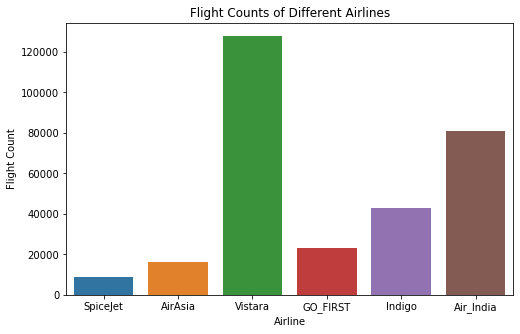

In [18]:
plt.figure(figsize = (8, 5))
sns.countplot(data=df_analysis,x = 'airline')
plt.title('Flight Counts of Different Airlines')
plt.xlabel("Airline")
plt.ylabel("Flight Count")
plt.show();

`Selanjutnya memvisualisasi jumlah penerbangan berdasarkan nama kode penerbangan`

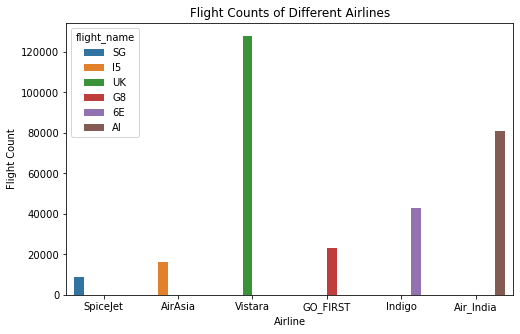

In [19]:
plt.figure(figsize = (8, 5))
sns.countplot(data=df_analysis,x = 'airline',hue='flight_name')
plt.title('Flight Counts of Different Airlines')
plt.xlabel("Airline")
plt.ylabel("Flight Count")
plt.show();

`Selanjutnya memvisualisasi nomor kode penerbangan dengan kota keberangkatan dan kota tujuannya, sebagai contoh SG-8709`

In [20]:
sg = df_analysis[(df_analysis['flight_name'] == 'SG') & (df_analysis['flight_no'] == '8709')]
sg.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,flight_name,flight_no
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,SG,8709
274,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,3,6060,SG,8709
398,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,4,5953,SG,8709
564,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,5,5953,SG,8709
739,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,6,5953,SG,8709


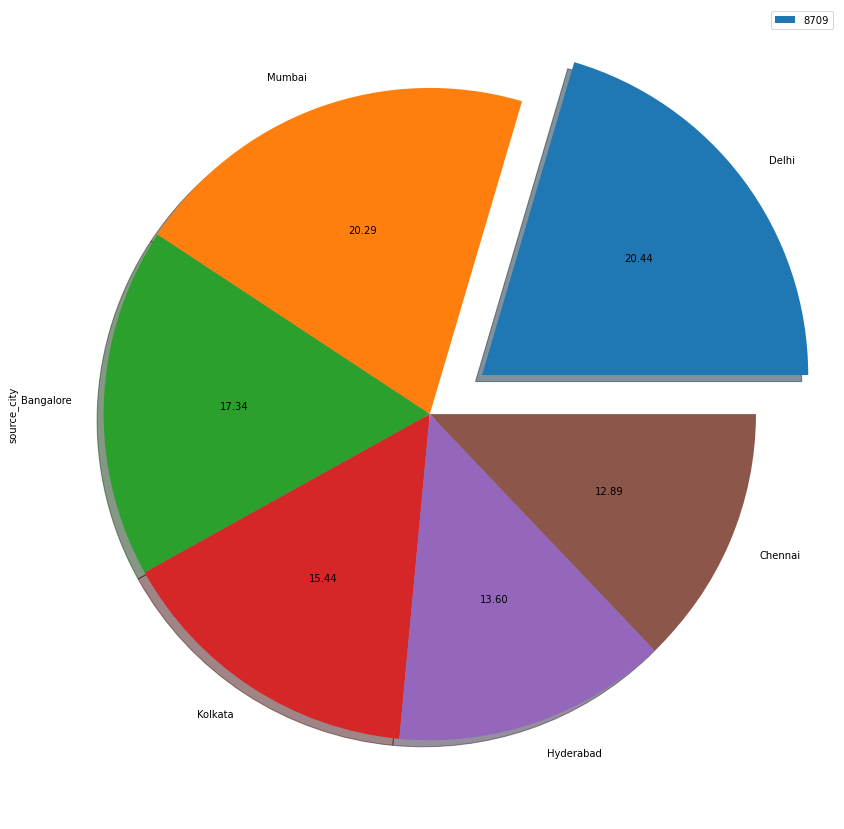

In [21]:
plt.figure(figsize = (15,15),facecolor='white')
df_analysis['source_city'].value_counts().plot(kind = 'pie',explode = [0.2,0.0,0.0,0.0,0.0,0.0], shadow = True,autopct = "%.2f")
plt.legend(['8709'])
plt.show()

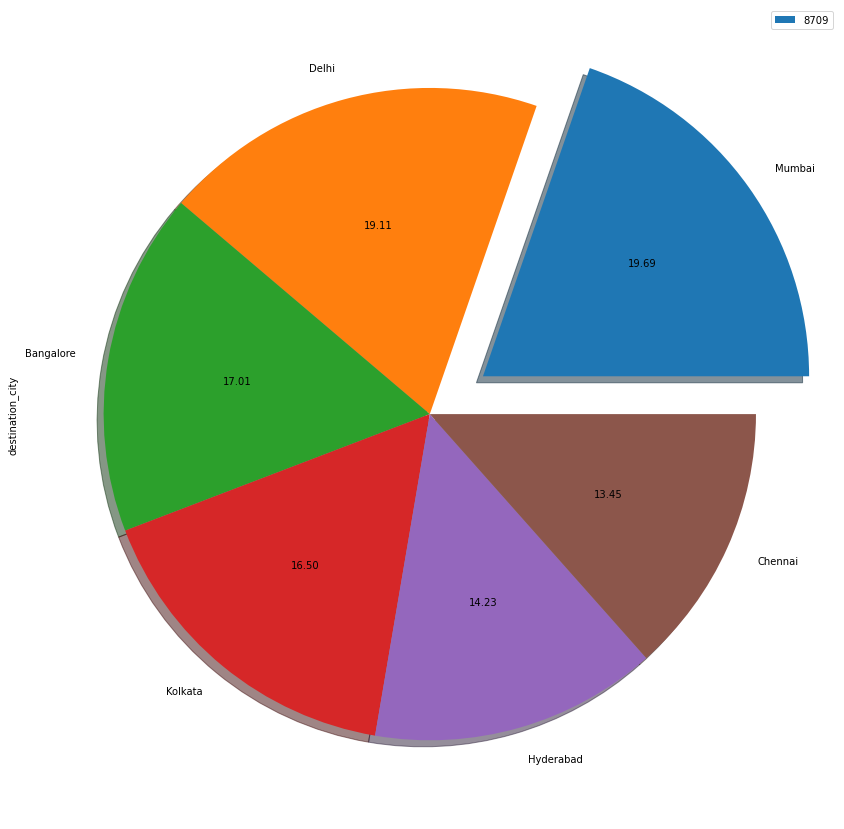

In [22]:
plt.figure(figsize = (15,15),facecolor='white')
df_analysis['destination_city'].value_counts().plot(kind = 'pie',explode = [0.2,0.0,0.0,0.0,0.0,0.0], shadow = True,autopct = "%.2f")
plt.legend(['8709'])
plt.show()

`Selanjutnya memvisualisasi pengaruh durasi penerbangan dengan harganya`

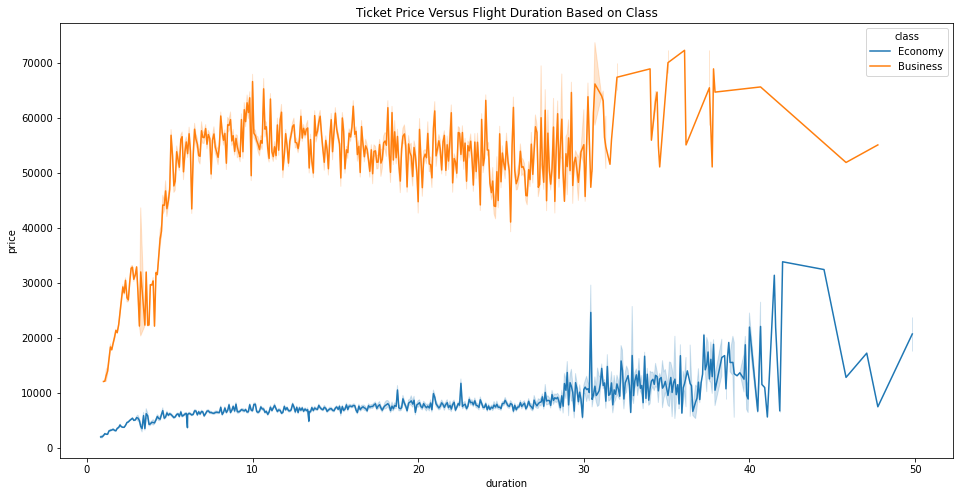

In [23]:
plt.figure(figsize = (16, 8))
sns.lineplot(data = df_analysis, x = 'duration', y= 'price', hue = 'class')
plt.title('Ticket Price Versus Flight Duration Based on Class')
plt.show()

`Selanjutnya memvisualisasi perbandingan kelas penerbangannya`

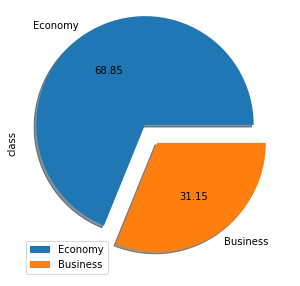

In [24]:
plt.figure(figsize = (8,5),facecolor='white')
df_analysis['class'].value_counts().plot(kind = 'pie',explode = [0.2,0.0], shadow = True,autopct = "%.2f")
plt.legend(['Economy','Business'])
plt.show()

`Selanjutnya memvisualisasi pengaruh jarak pembelian tiket dengan penerbangannya terhadap harganya`

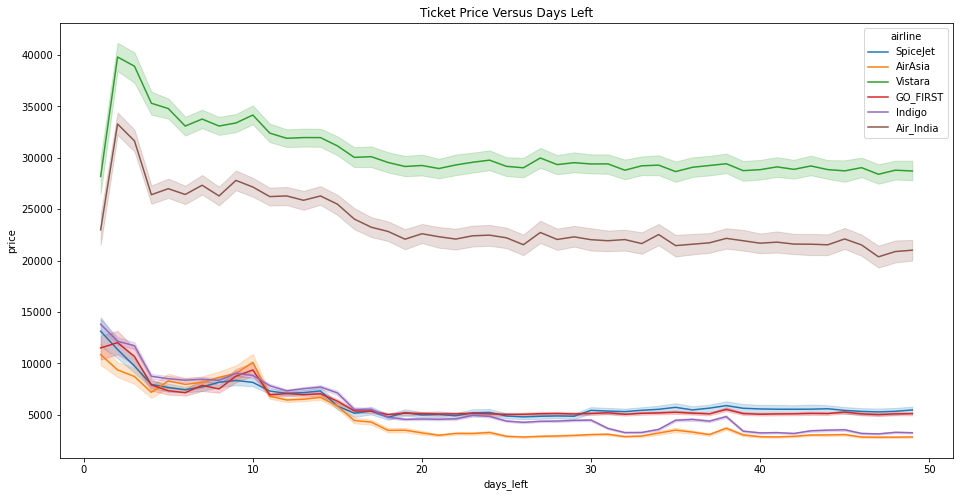

In [25]:
plt.figure(figsize = (16, 8))
sns.lineplot(data = df_analysis, x = 'days_left', y= 'price', hue = 'airline')
plt.title('Ticket Price Versus Days Left')
plt.show()

`Berdasarkan hasil EDA analysis yang diperoleh:`

- Nama kode penerbangan merupakan representasi dari nama maskapai penerbangannya, seperti kode penerbangan SG merepresentasikan maskapai SpiceJet. Sehingga nama kode penerbangan tidak digunakan sebagai fitur modeling
- Nomor kode penerbangan tidak merepresentasikan kota keberangkatan dan tujuan. Nomor kode tersebut merupakan identitas sebuah pesawat saja. Sehingga nomor kode penerbangan juga tidak digunakan sebagai fitur modeling.
- Berdasarkan durasi penerbangannya, semakin lama durasi penerbangannya maka harga tiket semakin mahal. Pada kelas ekonomi mempunyai kenaikan yang cukup signifikan jika durasi penerbangannya diatas 30 jam. Pada kelas bisnis, jika durasi penerbangan masih dibawah 5 jam maka harga tiketya tidak semahal durasi penerbangan diatas 5 jam. 
- Berdasarkan kelas penumpang atau kelas kursinya, terdapat dua kelas yaitu kelas ekonomi sebanyak 68.85% dan kelas bisnis sebanyak 31.15%
- Semakin penumpang membeli tiket mendekati keberangkatan pesawatnya maka harga tiket tersebut semakin mahal, tetapi pada maskapai penerbangan vistara dan air india sehari atau dua hari sebelum penerbangan harga tiket kedua maskapai tersebut turun cukup jauh dari dibanding seminggu sebelumnya

In [26]:
data_clean.drop(columns=['flight_name','flight_no'],axis=1,inplace=True)

### Split

`Sebelum data displit, diambil terlebih dahulu 2 baris data acak untuk data inference`

In [27]:
df_inf = data_clean.sample(2, random_state=0)
df_inf

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
44712,Vistara,Mumbai,Afternoon,one,Evening,Delhi,Economy,27.50,11,10721
233644,Vistara,Mumbai,Morning,one,Evening,Bangalore,Business,6.92,43,66928


`Selanjutnya, dipisahkan terlebih dahulu data frame yang ingin digunakan dengan data inferencenya. Agar tidak terjadinya kebocoran atau leaking pada data inference.` 

In [28]:
df = data_clean.drop(df_inf.index)

`Lalu, Data dibagi menjadi 2, x untuk feature dan y untuk target atau kolom price. Setelah data x dan y yang sudah didefinisikan, maka selanjutnya data tersebut displit menjadi 2 yaitu data train sebanyak 80% dan data test sebanyak 20%`

In [29]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=49)

In [30]:
for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(240120, 9)
(60031, 9)
(240120,)
(60031,)


`Dilihat dari bentuk datanya, data yg sudah displit sudah mempunyai baris yang sama di data x train dan y train, begitu juga dengan x test dan y test.`

In [31]:
df_eda = pd.concat([X_train, y_train], axis=1)

df_eda.shape

(240120, 10)

`Lalu digabung data x train atau fitur dengan y train atau target untuk digunakan pelatihan model` 

### Exploratory Data Analysis (EDA) Modeling

In [32]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240120 entries, 56814 to 262572
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           240120 non-null  object 
 1   source_city       240120 non-null  object 
 2   departure_time    240120 non-null  object 
 3   stops             240120 non-null  object 
 4   arrival_time      240120 non-null  object 
 5   destination_city  240120 non-null  object 
 6   class             240120 non-null  object 
 7   duration          240120 non-null  float64
 8   days_left         240120 non-null  int64  
 9   price             240120 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 20.2+ MB


`Membagi 2 data fitur berdasarkan numerik dan kategori. Numerik yang mempunyai tipe data int atau float selain target, sedangkan untuk kategori yang mempunyai tipe data object.`

In [33]:
df_eda.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
56814,GO_FIRST,Mumbai,Morning,one,Afternoon,Bangalore,Economy,3.67,24,5102
168368,Vistara,Hyderabad,Night,one,Morning,Bangalore,Economy,11.25,29,5441
117469,Air_India,Bangalore,Evening,one,Early_Morning,Chennai,Economy,13.17,25,3184
186548,Air_India,Chennai,Afternoon,one,Morning,Delhi,Economy,19.33,43,3916
288887,Vistara,Chennai,Afternoon,one,Evening,Delhi,Business,5.58,24,57920


In [34]:
num_col = ['duration','days_left'] 
cat_col = ['airline','source_city','departure_time','stops','arrival_time','destination_city','class'] 
target = ['price']

### Categorical Features

In [35]:
df_eda[cat_col]

,airline,source_city,departure_time,stops,arrival_time,destination_city,class
56814,GO_FIRST,Mumbai,Morning,one,Afternoon,Bangalore,Economy
168368,Vistara,Hyderabad,Night,one,Morning,Bangalore,Economy
117469,Air_India,Bangalore,Evening,one,Early_Morning,Chennai,Economy
186548,Air_India,Chennai,Afternoon,one,Morning,Delhi,Economy
288887,Vistara,Chennai,Afternoon,one,Evening,Delhi,Business
...,...,...,...,...,...,...,...
242574,Air_India,Mumbai,Evening,one,Evening,Chennai,Business
8050,Air_India,Delhi,Early_Morning,one,Night,Mumbai,Economy
7924,GO_FIRST,Delhi,Morning,zero,Afternoon,Mumbai,Economy
281784,Vistara,Hyderabad,Evening,one,Night,Bangalore,Business


`Selanjutnya mencari masing masing unique value pada kolom kategorikal`

In [36]:
for i in df_eda[cat_col].columns.tolist():
    print(f'num of unique label in {i}: ', len(df_eda[cat_col][i].unique()))

num of unique label in airline:  6
num of unique label in source_city:  6
num of unique label in departure_time:  6
num of unique label in stops:  3
num of unique label in arrival_time:  6
num of unique label in destination_city:  6
num of unique label in class:  2


#### Ordinal Encoder

`Selanjutnya mengencoding dengan ordinal pada kolom departure_time, stops, arrival_time, and class. Encoding tersebut berdasarkan dari yang terkecil seperti banyak pemeberhentian atau stops dimulai dari zero, untuk class dimulai dari ekonomi, dan departure beserta arrival time dimulai dari early morning hingga late night`

In [37]:
dep_cat = ['Early_Morning','Morning','Afternoon','Evening','Night','Late_Night']
stops_cat = ['zero','one','two_or_more']
arr_cat = ['Early_Morning','Morning','Afternoon','Evening','Night','Late_Night']
class_cat = ['Economy','Business']

ord_enc = OrdinalEncoder(categories=[dep_cat,stops_cat,arr_cat,class_cat])
cat_ord = pd.DataFrame(ord_enc.fit_transform(df_eda[['departure_time','stops','arrival_time','class']]))
df_eda.drop(columns=['departure_time','stops','arrival_time','class'],axis=1,inplace=True)
cat_ord.columns = ['departure_time','stops','arrival_time','class']
df_eda = pd.concat([df_eda.reset_index(drop=True), cat_ord], axis=1)



#### One Hot Encoding

`Selanjutnya mengencoding dengan OHE pada kolom airline, source_city, and destination_city untuk persiapan sebelum mencari korelasisnya dengan target`

In [38]:
ohe_enc = OneHotEncoder(sparse=False, handle_unknown='ignore')

cat_ohe = pd.DataFrame(ohe_enc.fit_transform(df_eda[['airline', 'source_city', 'destination_city']]))
cat_ohe.columns = ohe_enc.get_feature_names(['airline', 'source_city', 'destination_city'])
df_eda.drop(columns=['airline', 'source_city', 'destination_city'],axis=1,inplace=True)
df_eda = pd.concat([df_eda.reset_index(drop=True), cat_ohe], axis=1)
df_eda

,duration,days_left,price,departure_time,stops,arrival_time,class,airline_AirAsia,airline_Air_India,airline_GO_FIRST,...,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,3.67,24,5102,1.0,1.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,11.25,29,5441,4.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,13.17,25,3184,3.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,19.33,43,3916,2.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5.58,24,57920,2.0,1.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240115,24.00,17,49613,3.0,1.0,3.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
240116,13.25,40,5360,0.0,1.0,4.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
240117,2.33,40,2410,1.0,0.0,2.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
240118,5.67,28,63277,3.0,1.0,4.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


`Setelah semua kolom kategorikal diencoding, selanjutnya mencari masing masing korelasi kolom kategorikal yang sudah diencoding denga terget`

#### Heatmap for categorical

<AxesSubplot:>

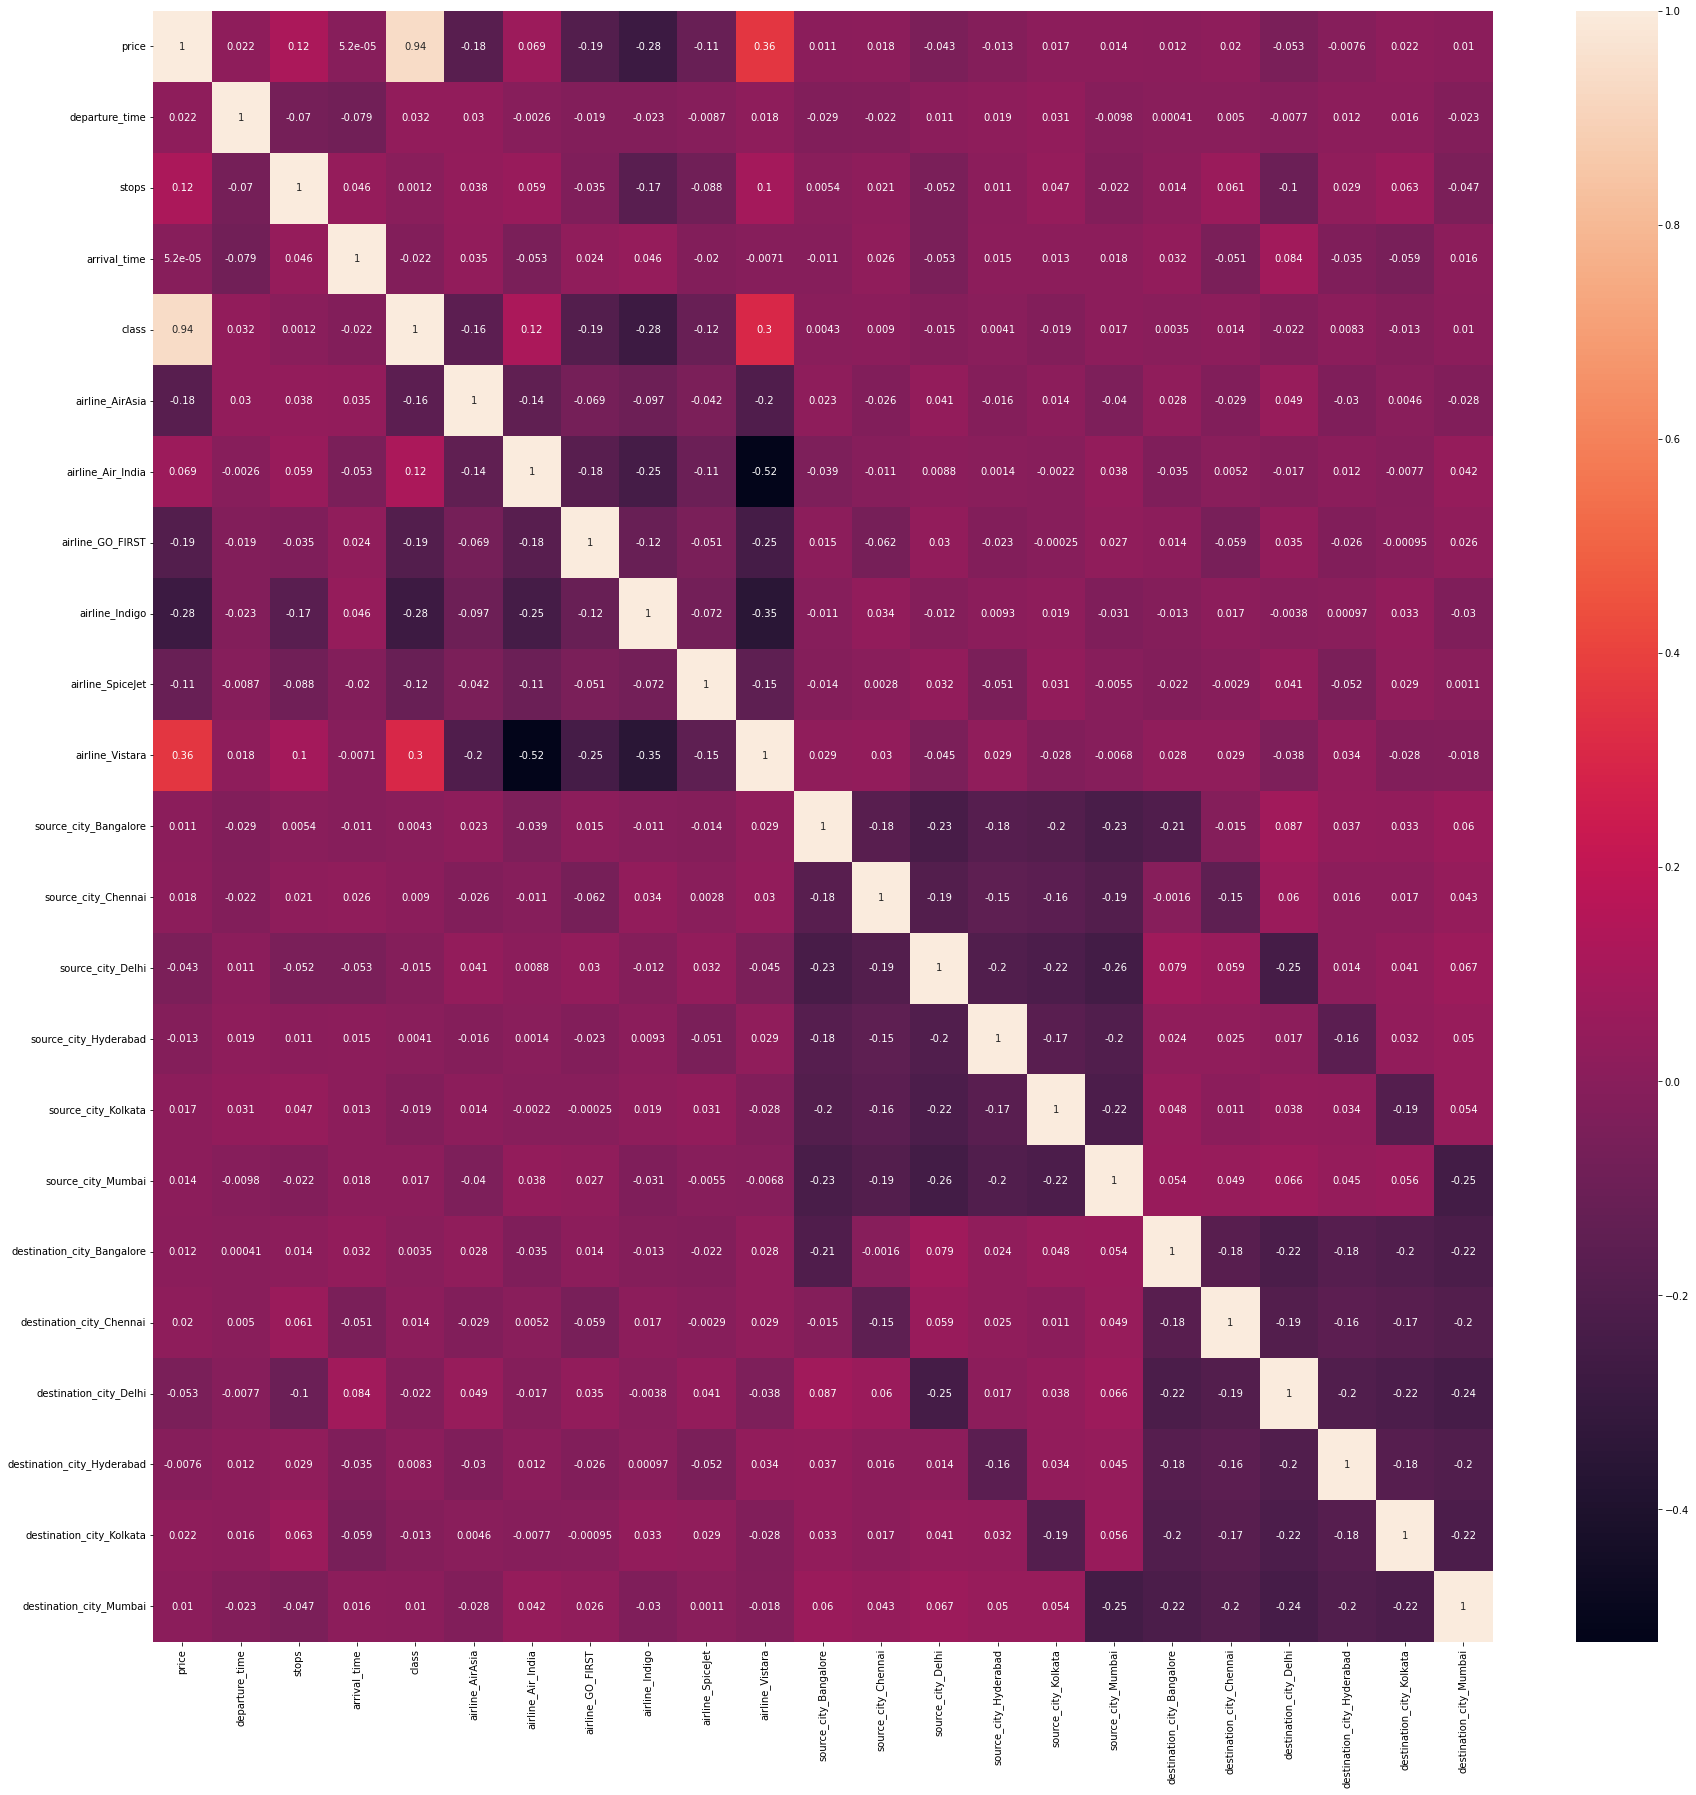

In [39]:
heat_cat = df_eda.drop(columns=['duration', 'days_left'])
plt.figure(figsize=(30,30))
sns.heatmap(heat_cat.corr(),annot=True)

`Kolom katgorik yang dipilih menjadi fitur modeling adalah kolom stops, class, dan airline. Dikarenakan hanya ketiga kolom tersebut yang mempunyai korelasi yang cukup baik yaitu diatas 0,1 dengan target`

### Numerical Features

`Selanjutnya mencari korelasi untuk fitur numerikal dengan target`

In [40]:
df_eda[num_col].head(3)

,duration,days_left
0,3.67,24
1,11.25,29
2,13.17,25


#### Outlier Handling

`Sebelum dilakukan outlier handling, mencari distribusi datanya terlebih dahulu disetiap kolomnya`

In [41]:
def coba(a,c):
  skewness = a[c].skew()
  print('skewnya',c,':',skewness)

for x in df_eda[num_col]:
    coba(df_eda,x)

skewnya duration : 0.6038865445902942
skewnya days_left : -0.03544109484078393


`Berikut untuk ilustrasi distribusi datanya`

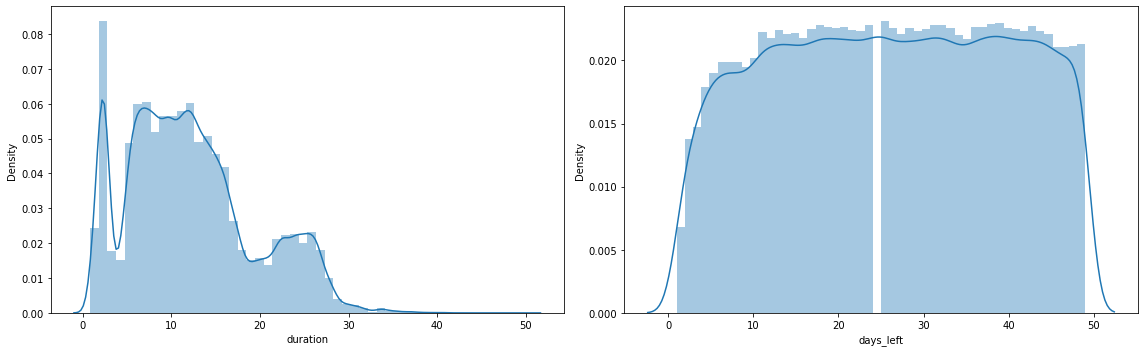

In [42]:
fig, ax = plt.subplots(ncols=2, figsize=(16,5))
ax = ax.flatten()
for i, col in enumerate(num_col):
    sns.distplot(df_eda[col], ax=ax[i])
plt.tight_layout()

`Sedangkan berikut, mencari masing masing outliernya`

In [43]:
def outlier_analysis(data,col):
  skewness = data[col].skew()
  if skewness>=-0.5 and skewness<=0.5:
    upper = data[col].mean() + 3*data[col].std()
    lower = data[col].mean() - 3*data[col].std()
  else:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q1 + 1.5*IQR
    lower = Q3 - 1.5*IQR
  
  no_outliers = data[(data[col]>=lower) & (data[col]<=upper)]
  outliers = data[(data[col]<lower) | (data[col]>upper)]
  print('percentage outlier from',i,':',len(outliers)/df_eda.shape[0] * 100, '%')
  return outliers,no_outliers, upper, lower

for i in list(df_eda[num_col].columns):
  outlier_analysis(df_eda[num_col],i)

percentage outlier from duration : 19.98292520406463 %
percentage outlier from days_left : 0.0 %


`Selanjutnya visualisasi keberadaan outliernya`

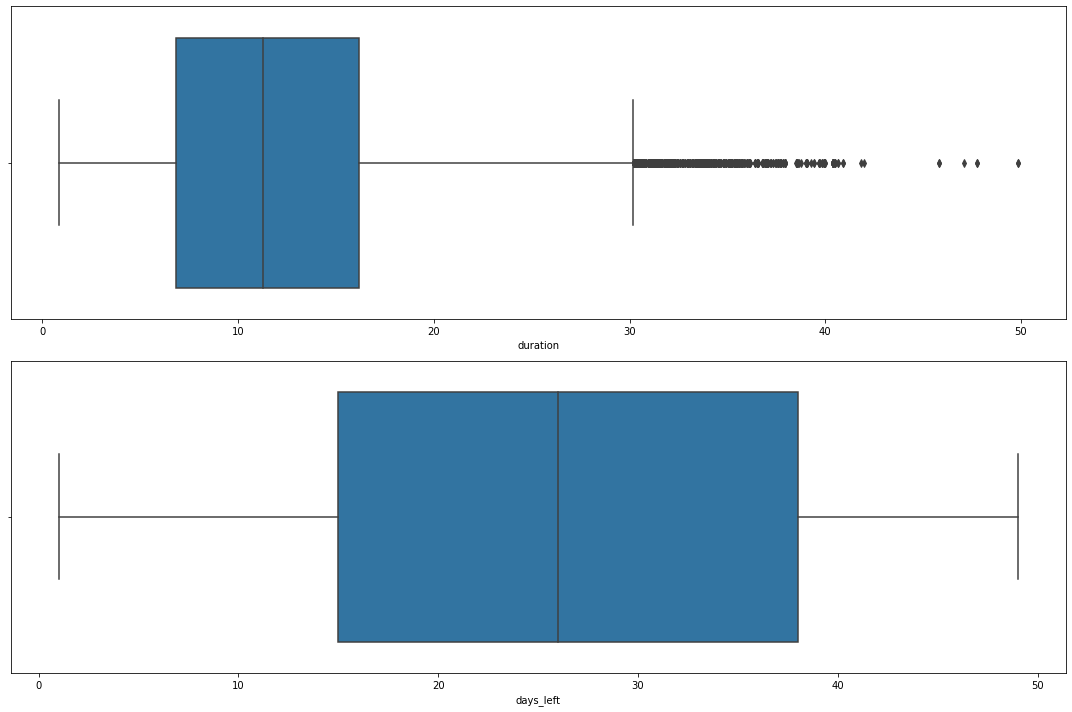

In [44]:
fig, ax = plt.subplots(nrows=2, figsize=(15,10))
ax = ax.flatten()
for i, col in enumerate(num_col):
    sns.boxplot(df_eda[col], ax=ax[i])
plt.tight_layout()

`Hanya pada kolom duration yang memiliki outlier, sehingga perlu dihandle outliernya pada kolom tersebut dengan metode cappingnya iqr sesuai distribusi datanya skew dengan fold 1,5 agar model tidak mempunyai banyak noise saat pelatihan atau training model.`

In [45]:
wins = Winsorizer(capping_method='iqr', tail='right', fold=1.5, variables=['duration'])

df_eda_cleaned = wins.fit_transform(df_eda)

#### Heatmap for numerikal

`Selanjutnya mencari korelasi kolom fitur numerikal yang akan dipakai dengan target price menggunakan heatmap correlation`

<AxesSubplot:>

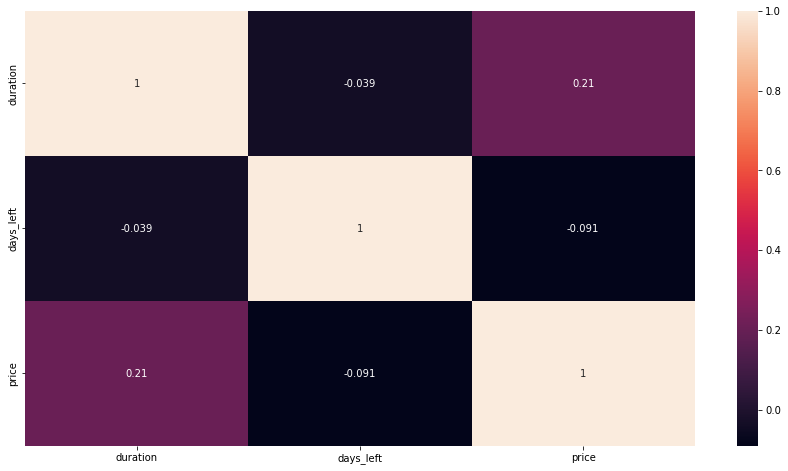

In [46]:
heat_num = ['duration','days_left','price']
plt.figure(figsize=(15,8))
sns.heatmap(df_eda_cleaned[heat_num].corr(),annot=True)

`Pada kolom numerikal, fitur yang dipilih adalah duration dikarenakan fitur tersebut mempunyai korelasi dengan target atau price yang cukup baik yaitu diatas 0,1. Sedangkan kolom days_left korelasinya masih dibawah 0,1 `

`Selanjutnya melakukan scaling untuk kolom numerikal saja`

#### Scaling

In [47]:
scaler = MinMaxScaler()

df_eda_cleaned[num_col] = scaler.fit_transform(df_eda_cleaned[num_col])
df_eda_cleaned

,duration,days_left,price,departure_time,stops,arrival_time,class,airline_AirAsia,airline_Air_India,airline_GO_FIRST,...,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0.096763,0.479167,5102,1.0,1.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.355026,0.583333,5441,4.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.420443,0.500000,3184,3.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.630324,0.875000,3916,2.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.161840,0.479167,57920,2.0,1.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240115,0.789438,0.333333,49613,3.0,1.0,3.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
240116,0.423169,0.812500,5360,0.0,1.0,4.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
240117,0.051107,0.812500,2410,1.0,0.0,2.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
240118,0.164906,0.562500,63277,3.0,1.0,4.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Berikut preprocessing yang dilakukan pada data train :

- Kolom categoric:
1. Ordinal encoding pada kolom stops dan class
2. OHE for airline
- Kolom Numeric:
1. Outlier Handling pada kolom duration menggunakan capping Winsorizer
2. Scaling pada kolom duration menggunakan MinMax Scaler

## v. Data Preprocessing

`Selanjutnya menggunakan pipeline untuk preprocessing, dikarenakan agar memudahkan saat preprocessing dan hasil model ini akan dibuat deploymentnya`

#### Pipeline Numerical

`Membuat pipeline yang berisi feature enginering yang telah dilakukan sebelumnya untuk kolom numerikal yang sudah dipilih yaitu duration`

In [48]:
num_pipeline = Pipeline([
        ('outlier', Winsorizer(capping_method='iqr', tail='right', fold=1.5)),
        ('scaler', MinMaxScaler())
    ])

num_tr = num_pipeline.fit_transform(X_train[['duration']])
num_tr

array([[0.0967632 ],
       [0.35502555],
       [0.42044293],
       ...,
       [0.05110733],
       [0.1649063 ],
       [0.28960818]])

#### Pipeline Categorical Ordinal Encoder

`Membuat pipeline yang berisi feature enginering ordinal encoder yang telah dilakukan sebelumnya untuk kolom kategorikal yang sudah dipilih yaitu stops dan class`

In [49]:
cat_1_pipeline = Pipeline([
        ('ordinal_enc', OrdinalEncoder(categories=[['zero','one','two_or_more'],['Economy','Business']]))
    ])

cat_1_tr = cat_1_pipeline.fit_transform(X_train[['stops','class']])
cat_1_tr

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 0.],
       [1., 1.],
       [1., 1.]])

`dan juga membuat pipeline yang berisi feature enginering One Hot Encoder yang telah dilakukan sebelumnya untuk kolom kategorikal yang sudah dipilih yaitu kolom airline`

In [50]:
cat_2_pipeline = Pipeline([
        ('ohe_enc', OneHotEncoder(sparse=False, handle_unknown='ignore'))
    ])

cat_2_tr = cat_2_pipeline.fit_transform(X_train[['airline']])
cat_2_tr

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

#### Full Pipeline 

`Setelah membuat masing pipeline untuk kolom numerikal dan kategorikal, selanjutnya menggabungkan ketiga pipeline yang sudah dibuat menjadi satu. Lalu dilatih dengan data training`

In [51]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, ['duration']),
        ("cat_ord", cat_1_pipeline, ['stops','class']),
        ("cat_ohe", cat_2_pipeline, ['airline']),
    ])

train_tr = full_pipeline.fit_transform(X_train)
train_tr

array([[0.0967632 , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.35502555, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.42044293, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.05110733, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.1649063 , 1.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.28960818, 1.        , 1.        , ..., 0.        , 0.        ,
        1.        ]])

`Setelah ditraining menggunakan pipeline, selanjutnya memeriksa hasil data yang dilatih pipeline dengan hasil data yang dilatih menggunakan preprocessing manual` 

In [52]:
train_manual = np.array(df_eda_cleaned[['duration', 'stops','class', 'airline_AirAsia','airline_Air_India','airline_GO_FIRST','airline_Indigo','airline_SpiceJet','airline_Vistara']])

np.allclose(train_tr, train_manual)

True

`Hasil keduanya sama atau cocok`

`Selanjutnya pipeline tersebut dimasukan ke dalam data testing`

In [53]:
test_tr = full_pipeline.transform(X_test)
test_tr

array([[0.45451448, 1.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.28960818, 2.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.29267462, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.25553663, 1.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.49710392, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.35502555, 2.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

## vi. Model Definition

`Selanjutnya memanggil model yang ingin dipakai yaitu linear regresi, decision tree regressor, random forest regressor, dan ridge`

In [54]:
# linear regression
lr_model = LinearRegression()

In [55]:
#Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=0)

In [56]:
#Random Forest Regressor
rf_model = RandomForestRegressor(random_state=0)

In [57]:
#Ridge
rid_model = Ridge()

## vii. Model Training

`Setelah dipanggil, selanjutnya setiap model melakukan pelatihan dengan parameter default pada data training yang sama`

In [58]:
lr_model.fit(train_tr, y_train)

LinearRegression()

In [59]:
dt_model.fit(train_tr, y_train)

DecisionTreeRegressor(random_state=0)

In [60]:
rf_model.fit(train_tr, y_train)

RandomForestRegressor(random_state=0)

In [61]:
rid_model.fit(train_tr, y_train)

Ridge()

## viii. Model Evaluation

`Selanjutnya membandingkan performa keempat model yang telah dilatih sebelumnya`

In [62]:
pred_train_lr = lr_model.predict(train_tr)
pred_test_lr = lr_model.predict(test_tr)

print("="*20,"TRAINING","="*20)
print("Mean absolute error:",mean_absolute_error(y_train,pred_train_lr))
print("R2 Score:",r2_score(y_train,pred_train_lr))
print("="*20,"TEST","="*20)
print("Mean absolute error:",mean_absolute_error(y_test,pred_test_lr))
print("R2 Score:",r2_score(y_test,pred_test_lr))

==================== TRAINING ====================
Mean absolute error: 4842.758400422184
R2 Score: 0.9000138246975448
==================== TEST ====================
Mean absolute error: 4824.952751755343
R2 Score: 0.9003987920602738


In [63]:
pred_train_dt = dt_model.predict(train_tr)
pred_test_dt = dt_model.predict(test_tr)

print("="*20,"TRAINING","="*20)
print("Mean absolute error:",mean_absolute_error(y_train,pred_train_dt))
print("R2 Score:",r2_score(y_train,pred_train_dt))
print("="*20,"TEST","="*20)
print("Mean absolute error:",mean_absolute_error(y_test,pred_test_dt))
print("R2 Score:",r2_score(y_test,pred_test_dt))

==================== TRAINING ====================
Mean absolute error: 3494.0960300908055
R2 Score: 0.9441479946123024
==================== TEST ====================
Mean absolute error: 3507.2293121497687
R2 Score: 0.9430003937703497


In [64]:
pred_train_rf = rf_model.predict(train_tr)
pred_test_rf = rf_model.predict(test_tr)

print("="*20,"TRAINING","="*20)
print("Mean absolute error:",mean_absolute_error(y_train,pred_train_rf))
print("R2 Score:",r2_score(y_train,pred_train_rf))
print("="*20,"TEST","="*20)
print("Mean absolute error:",mean_absolute_error(y_test,pred_test_rf))
print("R2 Score:",r2_score(y_test,pred_test_rf))

==================== TRAINING ====================
Mean absolute error: 3495.897908099282
R2 Score: 0.9441236981938341
==================== TEST ====================
Mean absolute error: 3507.462162935013
R2 Score: 0.9430061039172005


In [65]:
pred_train_rid = rid_model.predict(train_tr)
pred_test_rid = rid_model.predict(test_tr)

print("="*20,"TRAINING","="*20)
print("Mean absolute error:",mean_absolute_error(y_train,pred_train_rid))
print("R2 Score:",r2_score(y_train,pred_train_rid))
print("="*20,"TEST","="*20)
print("Mean absolute error:",mean_absolute_error(y_test,pred_test_rid))
print("R2 Score:",r2_score(y_test,pred_test_rid))

==================== TRAINING ====================
Mean absolute error: 4842.8019373130755
R2 Score: 0.900013828359527
==================== TEST ====================
Mean absolute error: 4825.004698816098
R2 Score: 0.900398610259658


`Dari keempat model yang telah dianalisis hasilnya, model decision tree adalah model yang paling bagus atau tepat untuk digunakan memprediksi harga tiket pesawat dengan hasilnya bestfit dan error sebesar 3507.22 atau R2 scorenya 0.943. Model Random forest juga cukup baik tetapi pada hasil error trainingnya lebih jelek dibanding decision tree yaitu selisih 1 saja. Hasil evaluasi tersebut bisa mirip karena cara kerja kedua model tersebut juga mirip yaitu tree model. Jadi model yang akan digunakan untuk selanjutnya adalah model decision tree`  

### Hyper-param Tuning

`Selanjutnya mencari hyperparameter yang tepat untuk model yang terpilih yaitu decision tree`

In [66]:
params = [
    {'splitter': ['best','random'],    #4                                       
     'max_depth': [20,50,60],        #4    
     'max_features':['auto','log2','sqrt'],
     'random_state':[1,10]}    #2   4*4*3*2=96 kombinasi      
  ]

grid_search = GridSearchCV(dt_model, params,
                           scoring='r2',
                           return_train_score=True)
grid_search.fit(train_tr, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid=[{'max_depth': [20, 50, 60],
                          'max_features': ['auto', 'log2', 'sqrt'],
                          'random_state': [1, 10],
                          'splitter': ['best', 'random']}],
             return_train_score=True, scoring='r2')

In [67]:
grid_search.best_params_

{'max_depth': 50,
 'max_features': 'log2',
 'random_state': 10,
 'splitter': 'random'}

In [68]:
grid_search.best_score_

0.9427804635480358

In [69]:
best_model = grid_search.best_estimator_

In [70]:
pred_train_dt_tuning = best_model.predict(train_tr)
pred_test_dt_tuning = best_model.predict(test_tr)

print("="*20,"TRAINING SETELAH TUNING","="*20)
print("Mean absolute error:",mean_absolute_error(y_train,pred_train_dt_tuning))
print("R2 Score:",r2_score(y_train,pred_train_dt_tuning))

print("="*20,"TRAINING SEBELUM TUNING","="*20)
print("Mean absolute error:",mean_absolute_error(y_train,pred_train_dt))
print("R2 Score:",r2_score(y_train,pred_train_dt))

print("="*20,"TEST SETELAH TUNING","="*20)
print("Mean absolute error:",mean_absolute_error(y_test,pred_test_dt_tuning))
print("R2 Score:",r2_score(y_test,pred_test_dt_tuning))

print("="*20,"TEST SEBELUM TUNING","="*20)
print("Mean absolute error:",mean_absolute_error(y_test,pred_test_dt))
print("R2 Score:",r2_score(y_test,pred_test_dt))

==================== TRAINING SETELAH TUNING ====================
Mean absolute error: 3494.0960300908055
R2 Score: 0.9441479946123024
==================== TRAINING SEBELUM TUNING ====================
Mean absolute error: 3494.0960300908055
R2 Score: 0.9441479946123024
==================== TEST SETELAH TUNING ====================
Mean absolute error: 3506.2821790016083
R2 Score: 0.9430950629482527
==================== TEST SEBELUM TUNING ====================
Mean absolute error: 3507.2293121497687
R2 Score: 0.9430003937703497


`Setalah melakukan hyperparameter tuning, didapatkan hyperparameter terbaik pada model decision tree yaitu menggunakan splitter random, lalu max depthnya sebanyak 50, max featuresnya menggunakan log2 dan random statenya 10. Dari hyperparameter tersebut didapat hasil testing r2 scorenya 0.943095 sedikit lebih baik dibanding dengan paramter default saja yaitu 0.94300. Sehingga selanjutnya model yang dipakai adalah decision tree dengan Hyperparameter yang telah di tuning`

### combine pipeline: preprocess + model

In [71]:
full_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('outlier',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5)),
                                                 ('scaler', MinMaxScaler())]),
                                 ['duration']),
                                ('cat_ord',
                                 Pipeline(steps=[('ordinal_enc',
                                                  OrdinalEncoder(categories=[['zero',
                                                                              'one',
                                                                              'two_or_more'],
                                                                             ['Economy',
                                                                              'Business']]))]),
                                 ['stops', 'class']),
                                ('cat_ohe',
                                 Pipeline(steps=[('ohe_enc',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['airline'])])

`Menggabungkan model decision tree yang telah dituning dengan pipeline sebelumnya, agar model dapat bekerja saat deployment nanti`

In [72]:
all_process = Pipeline([
    ("preprocess", full_pipeline),
    ("classification", best_model)
])

all_process.fit(X_train, y_train)
hasil = all_process.predict(X_test)

print("Mean absolute error:",mean_absolute_error(y_test,hasil))
print("R2 Score:",r2_score(y_test,hasil))

Mean absolute error: 3506.2821790016083
R2 Score: 0.9430950629482527


`Setelah dimasukan kedalam pipeline dan dicoba dengan memprediksi data testing, mempunyai r2 score yang sama dengan model sebelum dimasukan ke dalam pipeline`

## ix. Model Inference 

`Selanjutnya menggunakan data inference untuk membuktikan model tersebut sudah bisa diimplementasikan ke data aslinya atau belum`

In [83]:
df_inf

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
44712,Vistara,Mumbai,Afternoon,one,Evening,Delhi,Economy,27.50,11,10721
233644,Vistara,Mumbai,Morning,one,Evening,Bangalore,Business,6.92,43,66928


In [74]:
all_process.predict(df_inf)

array([11239.24752475, 66768.02631579])

`Hasil prediksi model pada data inference mempunyai hasil yang cukup baik. pada baris pertama mempunyai hasil prediksi harga 11239 dan harga aslinya 10721 yang dimana ada selisihnya berbeda sedikit sekitar 518 saja. Sehingga model tersebut sudah bisa dimasukan ke dalam deployment`

## x. Model Saving

`Sebelum membuat deployment, langkah awal adalah menyimpan model yang berada pipeline keseluruhan atau yang berisi apa saja yang digunakan untuk preprocessing`

In [75]:
# save model
pickle.dump(all_process, open("price_pred.pkl", "wb"))

In [76]:
set_config(display='diagram')

In [77]:
all_process

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5)),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['duration']),
                                                 ('cat_ord',
                                                  Pipeline(steps=[('ordinal_enc',
                                                                   OrdinalEncoder(categories=[['zero',
                                                                                               'one',
                                                                                               'two_or_more'],
                                                                                              ['Economy',
                                                                                               'Business']]))]),
                                                  ['stops', 'class']),
                                                 ('cat_ohe',
                                                  Pipeline(steps=[('ohe_enc',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['airline'])])),
                ('classification',
                 DecisionTreeRegressor(max_depth=50, max_features='log2',
                                       random_state=10, splitter='random'))])

### MODEL INFERENCE - DEPLOY

`Setelah disimpan, memastikan kembali model tersebut bisa memprediksi suatu data inference`

In [78]:
# STEP 1 - Import saved model
model = pickle.load(open("price_pred.pkl", "rb"))

In [79]:
# STEP 2 - model predict input data
clas = model.predict(df_inf).tolist()
clas

[11239.247524752474, 66768.02631578948]

`Dilihat dari hasil prediksinya, model yang telah disimpan pada file price_pred.pkl sudah dapat berjalan atau memprediksi harga`

## xi. Kesimpulan

`Berdasarkan analisis dan overview yang didapat:`

- Baris dan kolom pada data flight price sebanyak 300153 baris dan 12 kolom
- Pada data Flight Price tidak mempunyai missing value dan duplicate data
- Terdapat 1 kolom yang bernama Unnamed: 0 yang tidak digunakan karena kolom tersebut hanya merepresentasikan index saja
- Durasi penerbangan yang paling banyak adalah menyampai 49 jam lebih
- Jangka waktu terlama dari memesan tiket hingga penerbanganan adalah 49 hari
- Nama dan nomor kode penerbangan merupakan representasi dari nama maskapai penerbangannya dan nomor pesawatnya
- Berdasarkan durasi penerbangannya, semakin lama durasi penerbangannya maka harga tiket semakin mahal. Pada kelas ekonomi mempunyai kenaikan yang cukup signifikan jika durasi penerbangannya diatas 30 jam. Pada kelas bisnis, jika durasi penerbangan masih dibawah 5 jam maka harga tiketya tidak semahal durasi penerbangan diatas 5 jam
- Berdasarkan kelas penumpang atau kelas kursinya, terdapat dua kelas yaitu kelas ekonomi sebanyak 68.85% dan kelas bisnis sebanyak 31.15%
- Semakin penumpang membeli tiket mendekati keberangkatan pesawatnya maka harga tiket tersebut semakin mahal, tetapi pada maskapai penerbangan vistara dan air india sehari atau dua hari sebelum penerbangan harga tiket kedua maskapai tersebut turun cukup jauh dari dibanding seminggu sebelumnya
- Fitur yang digunakan untuk modeling adalah stops, class, airline, dan duration. Dikarenakan keempat fitur tersebut mempunyai korelasi yang lebih tinggi dengan target dibanding yang lainnya yaitu diatas 0,1
-  Dari hasil evaluasi 4 model dengan parameter default, model decision tree adalah model yang paling bagus atau tepat untuk digunakan memprediksi harga tiket pesawat dengan hasilnya bestfit dan error sebesar 3507.22 atau R2 scorenya 0.943. Model Random forest juga cukup baik tetapi pada hasil error trainingnya lebih jelek dibanding decision tree yaitu selisih 1 saja. Hasil evaluasi tersebut bisa mirip karena cara kerja kedua model tersebut juga mirip yaitu tree model. Jadi model yang terbaik pada data harga tiket pesawat adalah decision tree
- Hyperparameter tuning dilakukan dengan GridSearchCV pada model Decision Tree, didapatkan hyperparameter terbaik pada model decision tree yaitu menggunakan splitter random, lalu max depthnya sebanyak 50, max featuresnya menggunakan log2 dan random statenya 10. 
-  Hasil evaluasi dari hyperparameter yang telah dituning pada data testing adalah r2 scorenya 0.943095 sedikit lebih baik dibanding dengan parameter default saja yaitu 0.94300. Sedangkan untuk errornya yaitu 3506.28 rupee sedikit lebih baik juga dibanding dengan parameter defaultnya yaitu 3507.22 rupee. Hanya selisih 0,94 rupee saja.
- Dapat disimpulkan bahwa model decision tree dengan parameter yang telah dituning sudah cukup baik atau bagus dalam menebak harga tiket pesawat di India
